# 基于美国死刑数据的时间序列分析

In [1]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('../data/executions-to-2002.csv', low_memory=False)
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,8451,"(4) February, 2004",(1) All One Part,10001,(1) White,NaN,NORMAN ELI,(2) County-Local Jur,(4) Territorial,...,19.0,12.0,1812,1.0,(01) Alabama,1089,(41) Alabama (1819),(1) Male,NaN,(250) Flatboat Worker
1,2,8451,"(4) February, 2004",(1) All One Part,10002,(1) White,NaN,WOODS JOHN,(4) Other,(6) Other-Military,...,6.0,2.0,1814,1.0,(01) Alabama,1000,(41) Alabama (1819),(1) Male,NaN,(616) Soldier
2,3,8451,"(4) February, 2004",(1) All One Part,10003,(2) Black,NaN,GAMARRA CHARLES,(2) County-Local Jur,(2) State,...,19.0,5.0,1820,1.0,(01) Alabama,1097,(41) Alabama (1819),(1) Male,NaN,NaN
3,4,8451,"(4) February, 2004",(1) All One Part,10004,(2) Black,NaN,DESAYAS VICTORIANO,(2) County-Local Jur,(2) State,...,19.0,5.0,1820,2.0,(01) Alabama,1097,(41) Alabama (1819),(1) Male,NaN,NaN
4,5,8451,"(4) February, 2004",(1) All One Part,10005,(2) Black,NaN,NOREAGO FRANCISCO,(2) County-Local Jur,(2) State,...,30.0,5.0,1822,1.0,(01) Alabama,1097,(41) Alabama (1819),(1) Male,NaN,(187) Deserter


In [21]:
df['V14'][1121]

1911

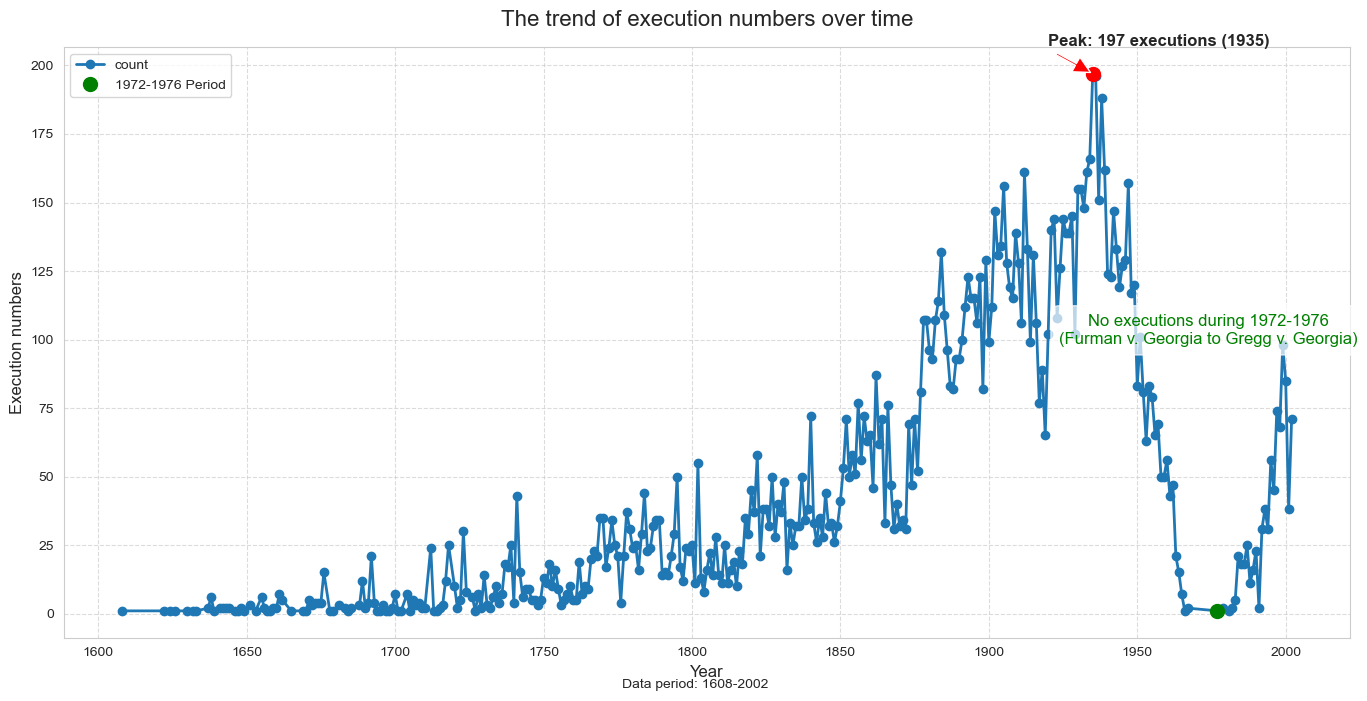

数据集中包含了从1608年到2002年的死刑数据
执行数量最多的年份是1935年，共有197次执行


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 统计每年的死刑执行数量
executions_by_year = df['V14'].value_counts().sort_index()

# 找出执行数量最多的年份和数量
max_year = executions_by_year.idxmax()
max_count = executions_by_year.max()

# 设置风格
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# 绘制主图
ax = executions_by_year.plot(kind='line', marker='o', linestyle='-', 
                           color='#1f77b4', linewidth=2, markersize=6)

# 标记最高点
plt.plot(max_year, max_count, 'ro', markersize=10)
plt.annotate(f'Peak: {max_count} executions ({max_year})',
             xy=(max_year, max_count),
             xytext=(max_year-15, max_count+10),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1.5),
             fontsize=12, fontweight='bold')

# 标记1972-1976年间的点
years_to_highlight = executions_by_year.loc[1971:1977]
if not years_to_highlight.empty:
    plt.plot(years_to_highlight.index, years_to_highlight.values, 'o', 
             color='green', markersize=10, label='1972-1976 Period')
# 如果没有数据点，添加一个注释说明
plt.text(1974, max_count/2, 
            "No executions during 1972-1976\n(Furman v. Georgia to Gregg v. Georgia)",
            fontsize=12, color='green', ha='center', 
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

# 设置标题和标签
plt.title('The trend of execution numbers over time', fontsize=16, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Execution numbers', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 添加辅助信息
date_range = f"Data period: {executions_by_year.index.min()}-{executions_by_year.index.max()}"
plt.figtext(0.5, 0.01, date_range, ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../visualize/executions_trend.png', dpi=300)
plt.show()

# 显示统计数据
print(f"数据集中包含了从{executions_by_year.index.min()}年到{executions_by_year.index.max()}年的死刑数据")
print(f"执行数量最多的年份是{max_year}年，共有{max_count}次执行")


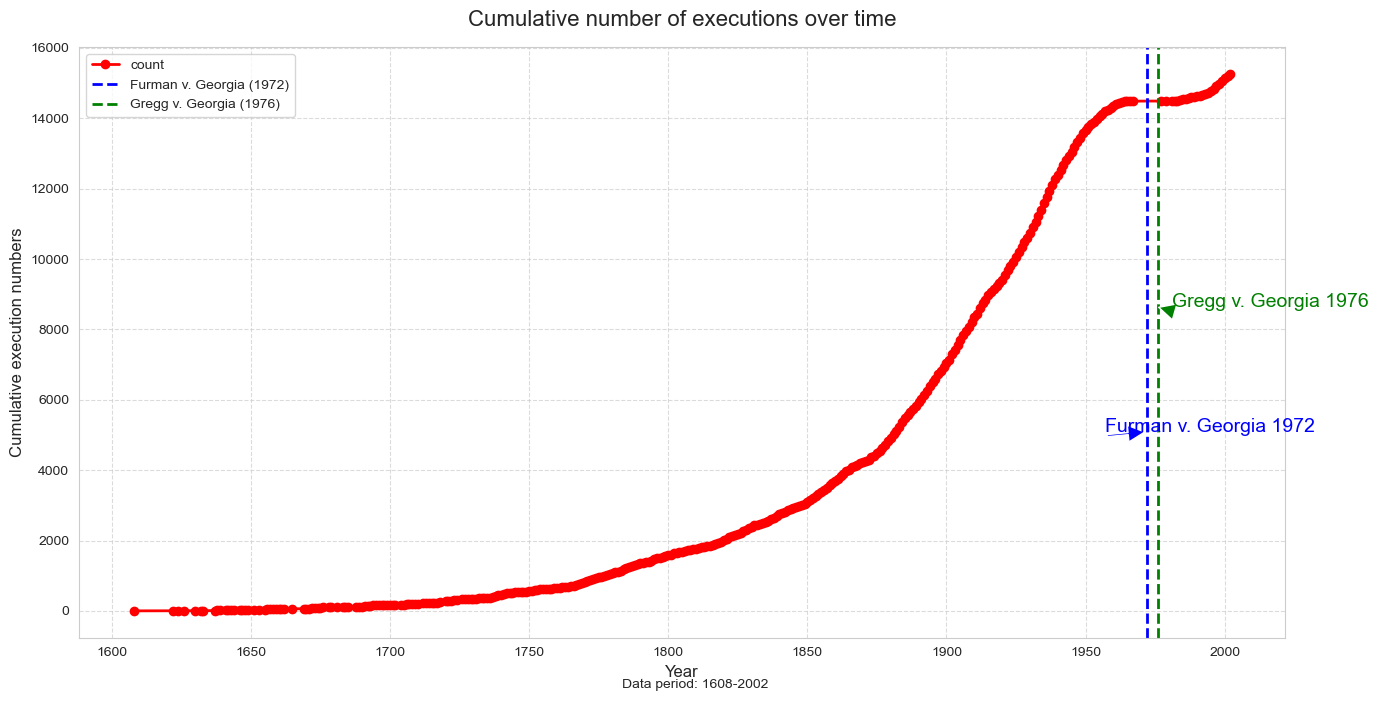

从1608年到2002年，累计执行了15268次死刑


In [44]:
# Calculate cumulative executions over time
cumulative_executions = executions_by_year.cumsum()

# Find the final year and total count
final_year = cumulative_executions.index[-1]
total_executions = cumulative_executions.iloc[-1]

# 设置风格
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# 绘制累计死刑数据折线图
ax = cumulative_executions.plot(kind='line', marker='o', linestyle='-', 
                           color='red', linewidth=2, markersize=6)

# 添加1972和1976年的垂直线
plt.axvline(x=1972, color='blue', linestyle='--', linewidth=2, label='Furman v. Georgia (1972)')
plt.axvline(x=1976, color='green', linestyle='--', linewidth=2, label='Gregg v. Georgia (1976)')

# 添加标注
plt.annotate('Furman v. Georgia 1972', xy=(1972, cumulative_executions.max()/3), 
             xytext=(1972-15, cumulative_executions.max()/3),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5),
             fontsize=14, color='blue')

plt.annotate('Gregg v. Georgia 1976', xy=(1976, cumulative_executions.max()/2+1000), 
             xytext=(1976+5, cumulative_executions.max()/2+1000),
             arrowprops=dict(facecolor='green', shrink=0.05, width=1.5),
             fontsize=14, color='green')

# 设置标题和标签
plt.title('Cumulative number of executions over time', fontsize=16, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative execution numbers', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 添加辅助信息
plt.figtext(0.5, 0.01, date_range, ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../visualize/cumulative_executions_trend.png', dpi=300)
plt.show()

# 显示统计数据
print(f"从{cumulative_executions.index.min()}年到{cumulative_executions.index.max()}年，累计执行了{total_executions}次死刑")

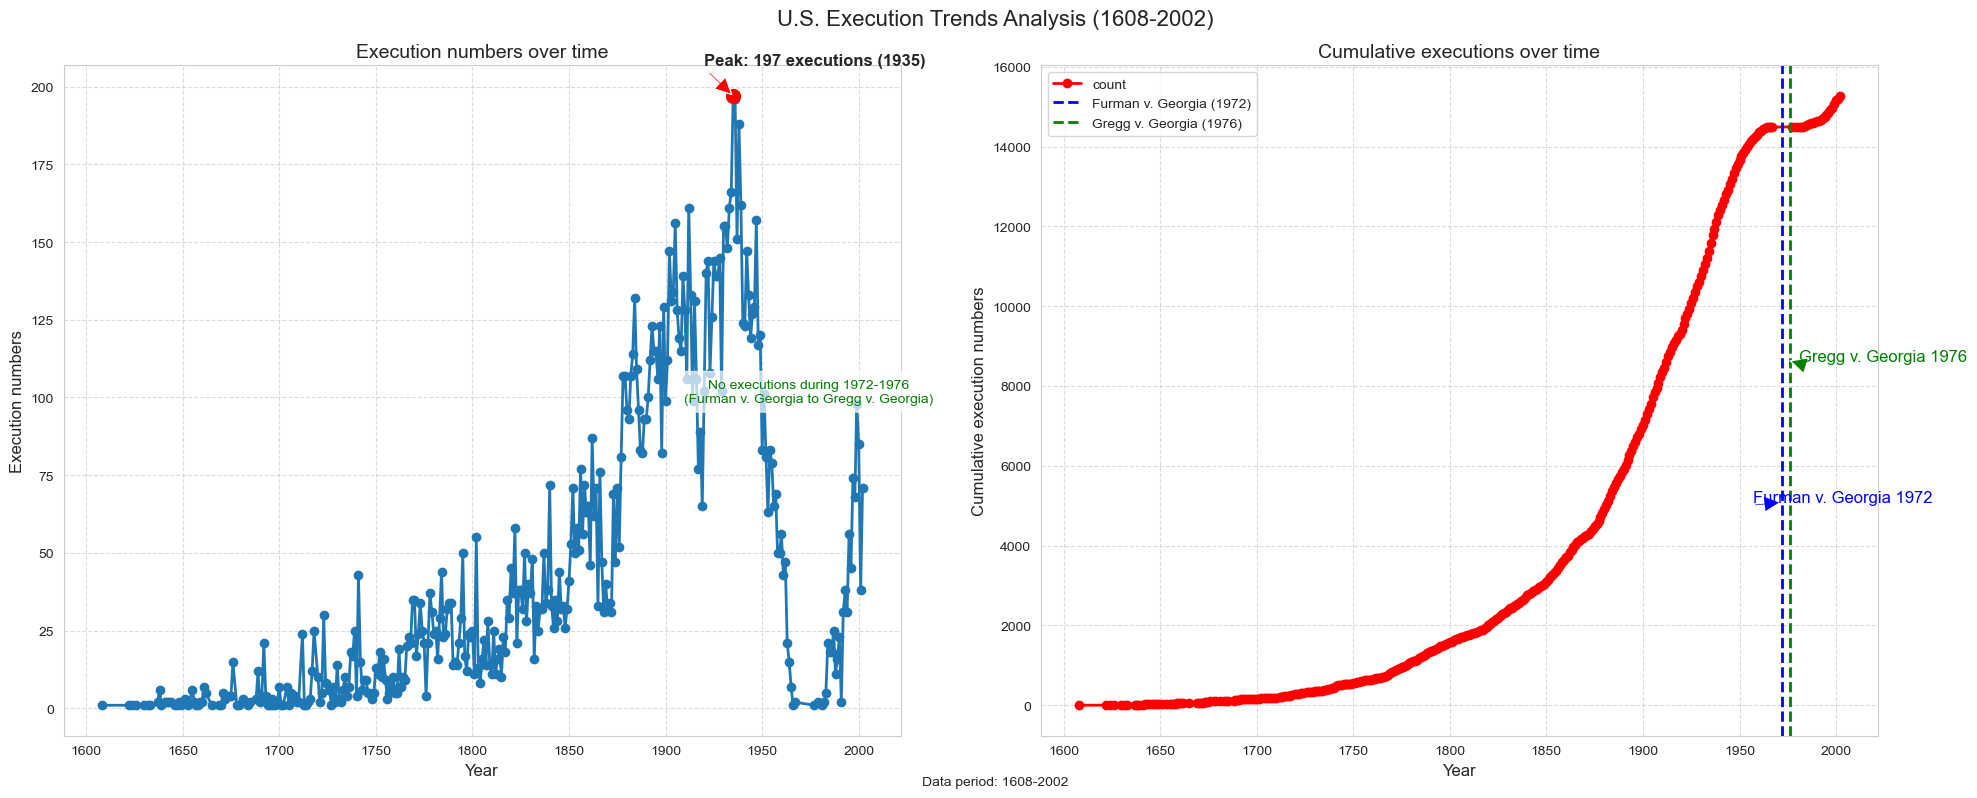

In [45]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Subplot 1: Execution numbers over time
executions_by_year.plot(kind='line', marker='o', linestyle='-', 
                      color='#1f77b4', linewidth=2, markersize=6, ax=axes[0])

# Highlight peak
axes[0].plot(max_year, max_count, 'ro', markersize=10)
axes[0].annotate(f'Peak: {max_count} executions ({max_year})',
                xy=(max_year, max_count),
                xytext=(max_year-15, max_count+10),
                arrowprops=dict(facecolor='red', shrink=0.05, width=1.5),
                fontsize=12, fontweight='bold')

# Highlight 1972-1976 period
axes[0].text(1974, max_count/2, 
            "No executions during 1972-1976\n(Furman v. Georgia to Gregg v. Georgia)",
            fontsize=10, color='green', ha='center', 
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

# Labels and title for first subplot
axes[0].set_title('Execution numbers over time', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Execution numbers', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Cumulative executions
cumulative_executions.plot(kind='line', marker='o', linestyle='-', 
                          color='red', linewidth=2, markersize=6, ax=axes[1])

# Add vertical lines for important years
axes[1].axvline(x=1972, color='blue', linestyle='--', linewidth=2, label='Furman v. Georgia (1972)')
axes[1].axvline(x=1976, color='green', linestyle='--', linewidth=2, label='Gregg v. Georgia (1976)')

# Add annotations
axes[1].annotate('Furman v. Georgia 1972', xy=(1972, cumulative_executions.max()/3), 
                xytext=(1972-15, cumulative_executions.max()/3),
                arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5),
                fontsize=12, color='blue')

axes[1].annotate('Gregg v. Georgia 1976', xy=(1976, cumulative_executions.max()/2+1000), 
                xytext=(1976+5, cumulative_executions.max()/2+1000),
                arrowprops=dict(facecolor='green', shrink=0.05, width=1.5),
                fontsize=12, color='green')

# Labels and title for second subplot
axes[1].set_title('Cumulative executions over time', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Cumulative execution numbers', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend()

# Overall figure title
fig.suptitle('U.S. Execution Trends Analysis (1608-2002)', fontsize=16, y=0.98)

# Add data period info
fig.text(0.5, 0.01, date_range, ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../visualize/combined_execution_trends.png', dpi=300)
plt.show()
